## Import Packages

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNetCV

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import GridSearchCV

## Read the data

In [2]:
df = pd.read_csv('CarPrice_Assignment.csv')

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

## Data Visualize

A little about object type columns

In [17]:
df['CarName'].value_counts()

CarName
toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: count, Length: 147, dtype: int64

In [18]:
df['fueltype'].value_counts()

fueltype
gas       185
diesel     20
Name: count, dtype: int64

Chart showing the numeric

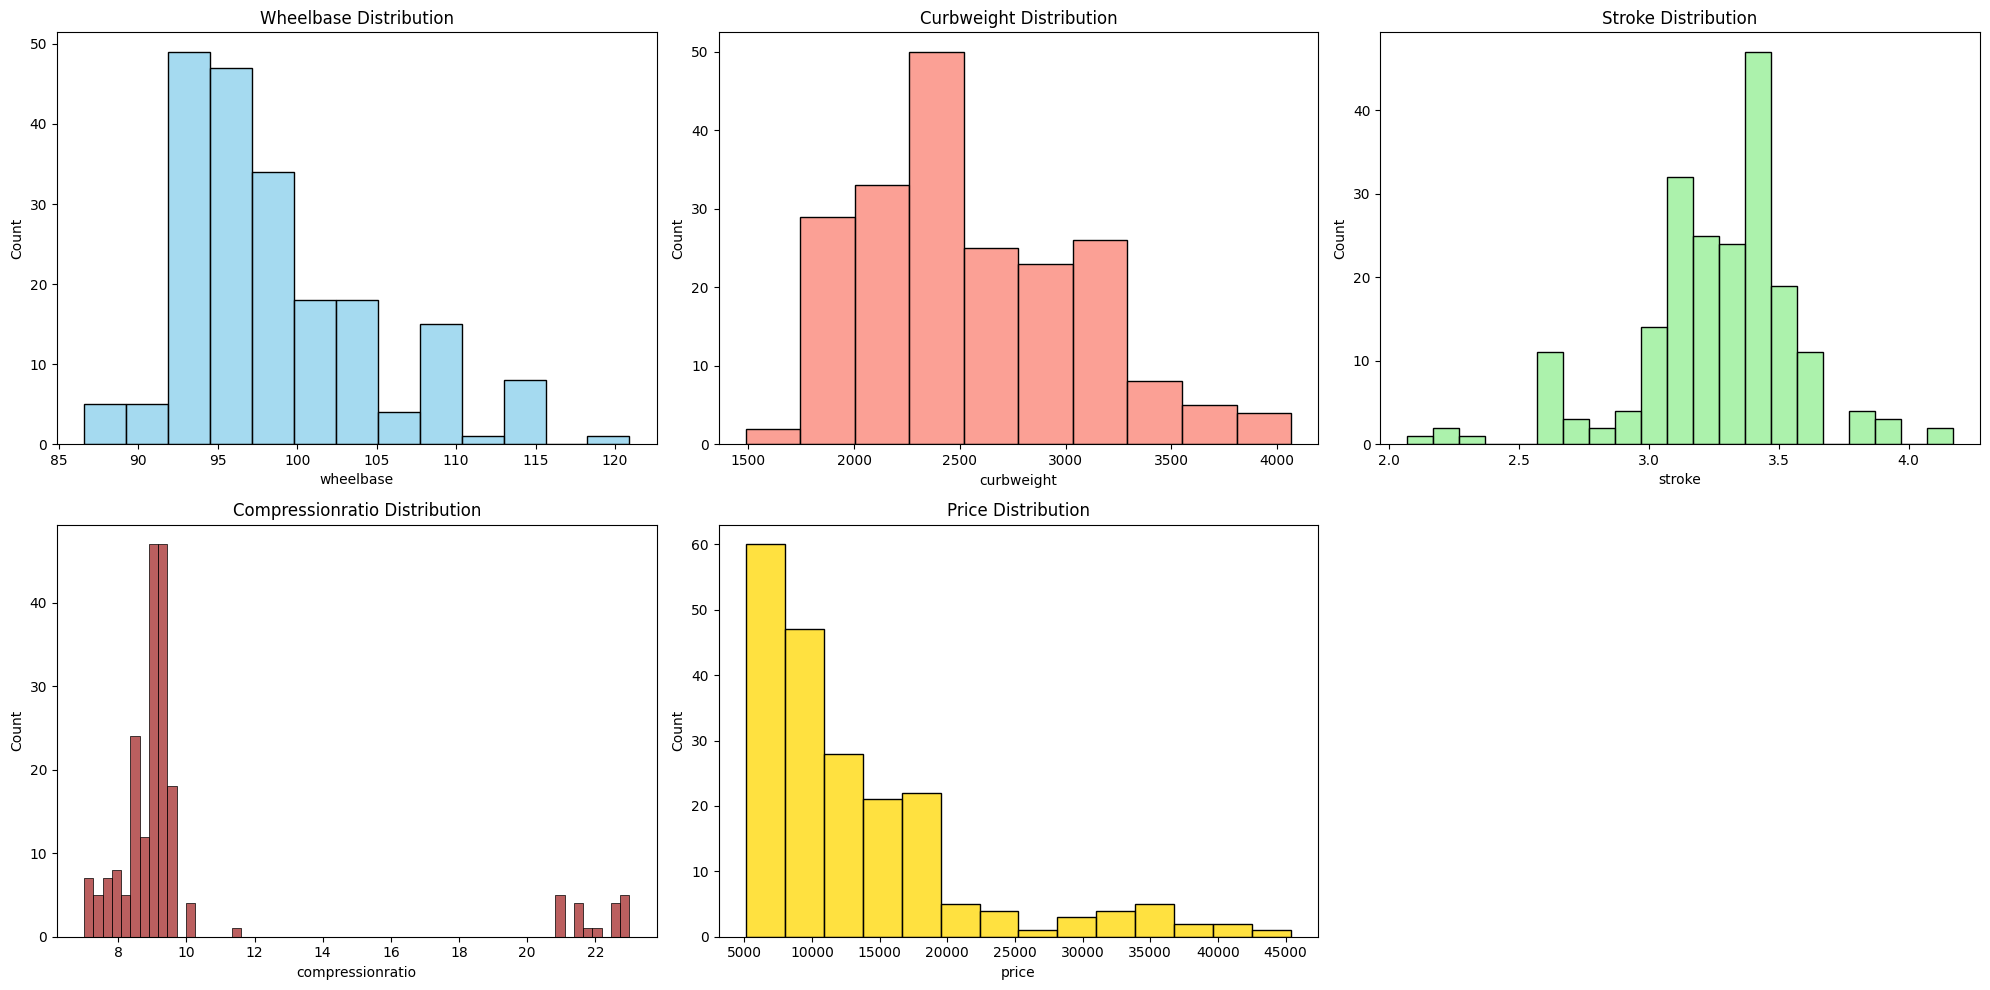

In [25]:
fig, ax = plt.subplots(figsize= (20, 10), nrows=2, ncols= 3)

#plot 1: wheelbase
sns.histplot(df['wheelbase'], ax=ax[0, 0], color='skyblue')
ax[0, 0].set_title('Wheelbase Distribution')

#plot 2: 
sns.histplot(df['curbweight'], ax=ax[0, 1], color='salmon')
ax[0, 1].set_title('Curbweight Distribution')

#plot 3: Stroke
sns.histplot(df['stroke'], ax=ax[0, 2], color='lightgreen')
ax[0, 2].set_title('Stroke Distribution')

#plot 4: compressionratio
sns.histplot(df['compressionratio'], ax=ax[1, 0], color='brown')
ax[1, 0].set_title('Compressionratio Distribution')

#plot 5: Price
sns.histplot(df['price'], ax=ax[1, 1], color= 'gold')
ax[1, 1].set_title('Price Distribution')

#plot 6: off
ax[1, 2].axis('off')

#Adjust layout
plt.tight_layout()
plt.show()

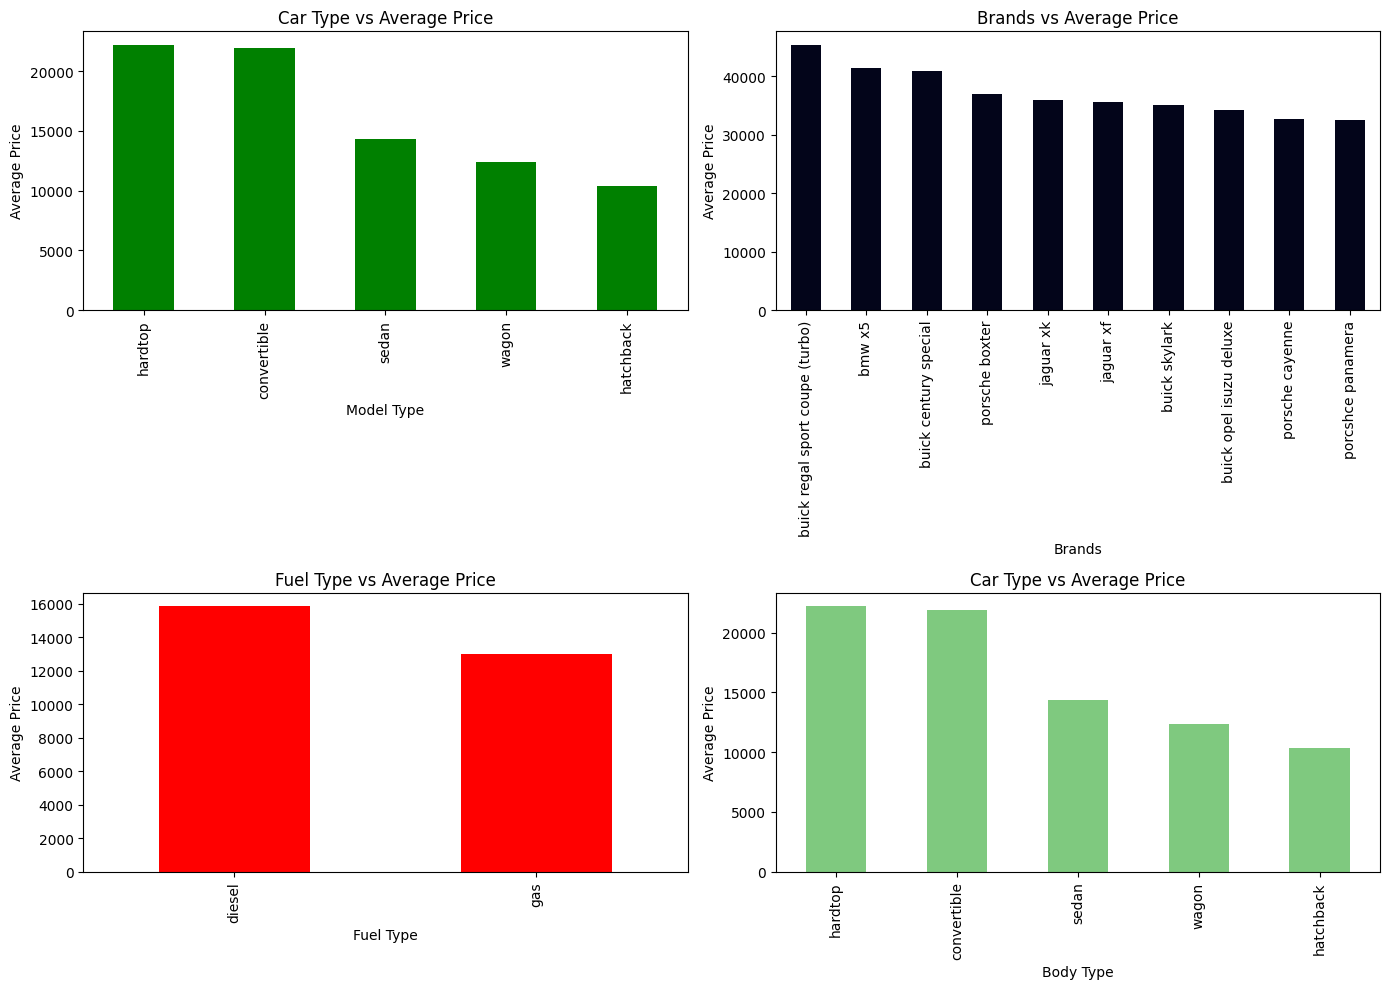

In [29]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Distribution of Prices over Car Body Type
(df.groupby(['carbody'])['price'].mean().sort_values(ascending=False)).plot.bar(ax=axes[0, 0], cmap='ocean')
axes[0, 0].set_title('Car Type vs Average Price')
axes[0, 0].set_xlabel("Model Type")
axes[0, 0].set_ylabel("Average Price")

# Distribution of Prices over Brands (using 'CarName' instead of 'car_company')
(df.groupby(['CarName'])['price'].mean().sort_values(ascending=False).nlargest(10)).plot.bar(ax=axes[0, 1], cmap='rocket')
axes[0, 1].set_title('Brands vs Average Price')
axes[0, 1].set_xlabel("Brands")
axes[0, 1].set_ylabel("Average Price")

# Distribution of Prices over Fuel Type
(df.groupby(['fueltype'])['price'].mean().sort_values(ascending=False)).plot.bar(ax=axes[1, 0], cmap='prism')
axes[1, 0].set_title('Fuel Type vs Average Price')
axes[1, 0].set_xlabel("Fuel Type")
axes[1, 0].set_ylabel("Average Price")

# Distribution of Prices over Car's Body Type
(df.groupby(['carbody'])['price'].mean().sort_values(ascending=False)).plot.bar(ax=axes[1, 1], cmap='Accent')
axes[1, 1].set_title('Car Type vs Average Price')
axes[1, 1].set_xlabel("Body Type")
axes[1, 1].set_ylabel("Average Price")

plt.tight_layout()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_6668\1621561933.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df.doornumber, y=df.price, palette='viridis', ax=axes[0, 0])
C:\Users\Admin\AppData\Local\Temp\ipykernel_6668\1621561933.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df.aspiration, y=df.price, palette='magma', ax=axes[0, 1])
C:\Users\Admin\AppData\Local\Temp\ipykernel_6668\1621561933.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df.enginelocation, y=df.price, palette='plasma', ax=axes[0, 2])
C:\Users\Admin\AppDa

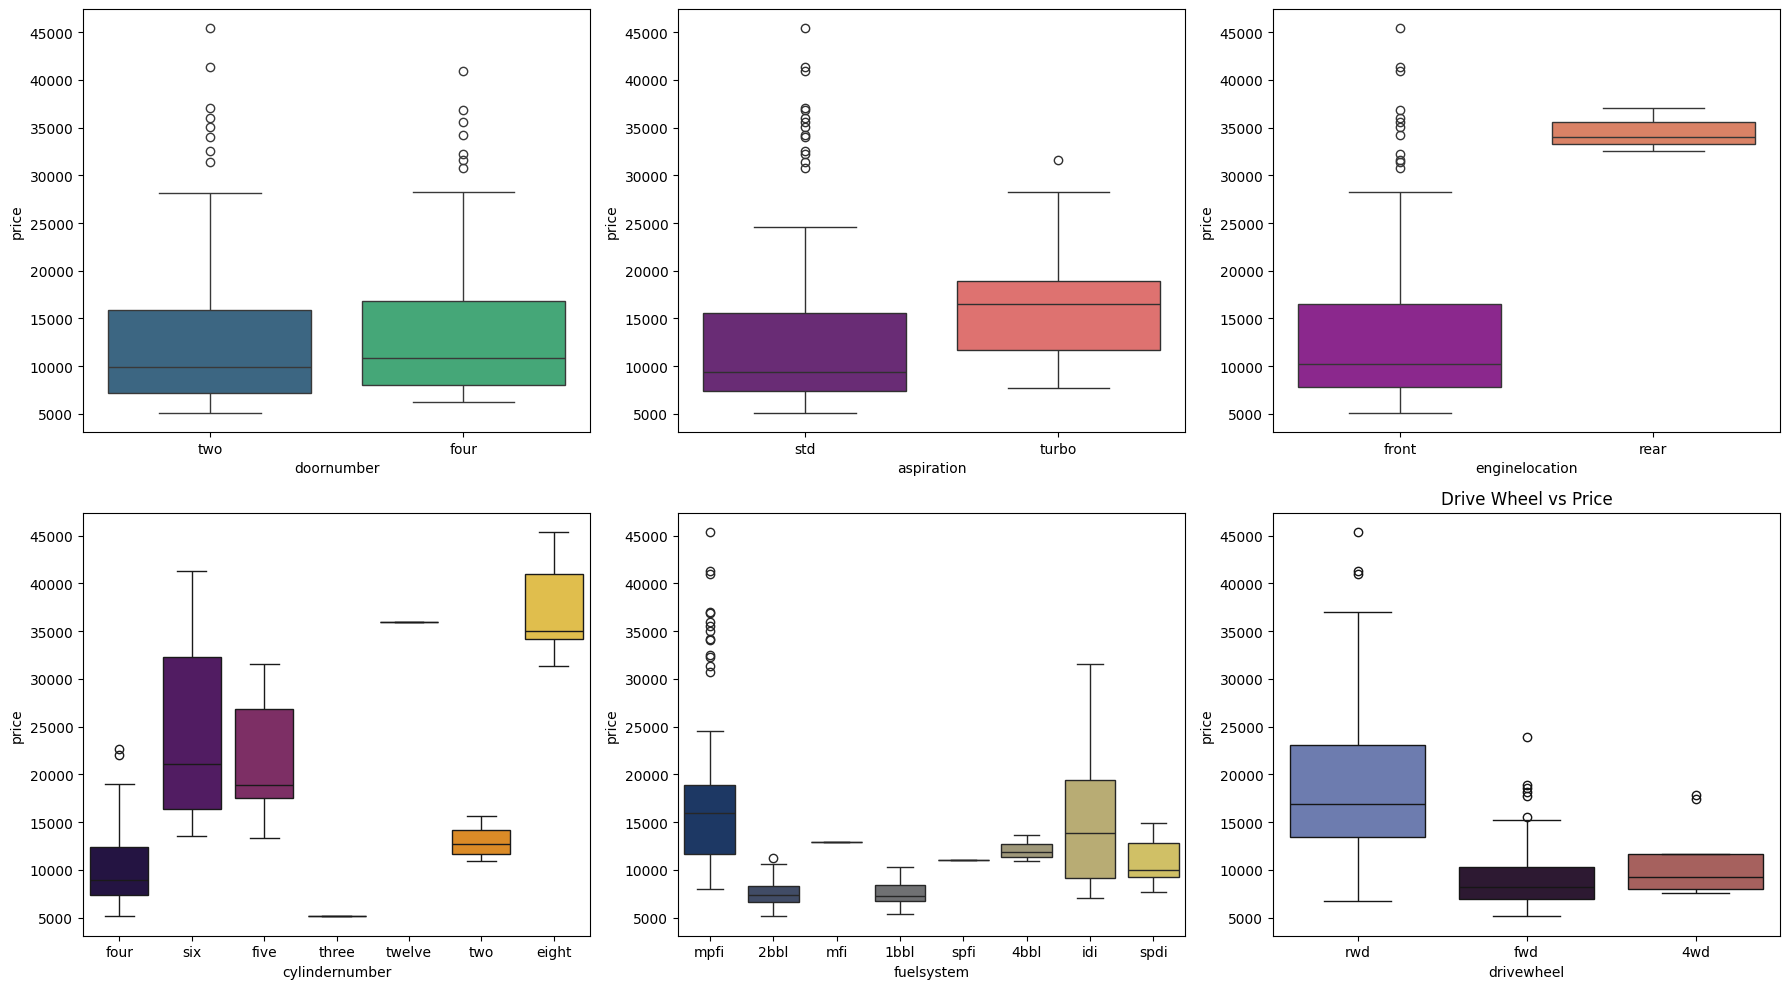

In [31]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# Box plot for Door Number vs Price
plt.title('Door Number vs Price')
sns.boxplot(x=df.doornumber, y=df.price, palette='viridis', ax=axes[0, 0])

# Box plot for Aspiration vs Price
plt.title('Aspiration vs Price')
sns.boxplot(x=df.aspiration, y=df.price, palette='magma', ax=axes[0, 1])

# Box plot for Engine Location vs Price
plt.title('Engine Location vs Price')
sns.boxplot(x=df.enginelocation, y=df.price, palette='plasma', ax=axes[0, 2])

# Box plot for Cylinder Number vs Price
plt.title('Cylinder Number vs Price')
sns.boxplot(x=df.cylindernumber, y=df.price, palette='inferno', ax=axes[1, 0])

# Box plot for Fuel System vs Price
plt.title('Fuel System vs Price')
sns.boxplot(x=df.fuelsystem, y=df.price, palette='cividis', ax=axes[1, 1])

# Box plot for Drive Wheel vs Price
plt.title('Drive Wheel vs Price')
sns.boxplot(x=df.drivewheel, y=df.price, palette='twilight', ax=axes[1, 2])

plt.tight_layout()
plt.show()

## Cleaning Data

In [32]:
df = df.drop(columns = ['symboling', 'car_ID'], axis= 1)
df.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [34]:
cars_numeric = df.select_dtypes(include=['float', 'int'])
cars_numeric.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


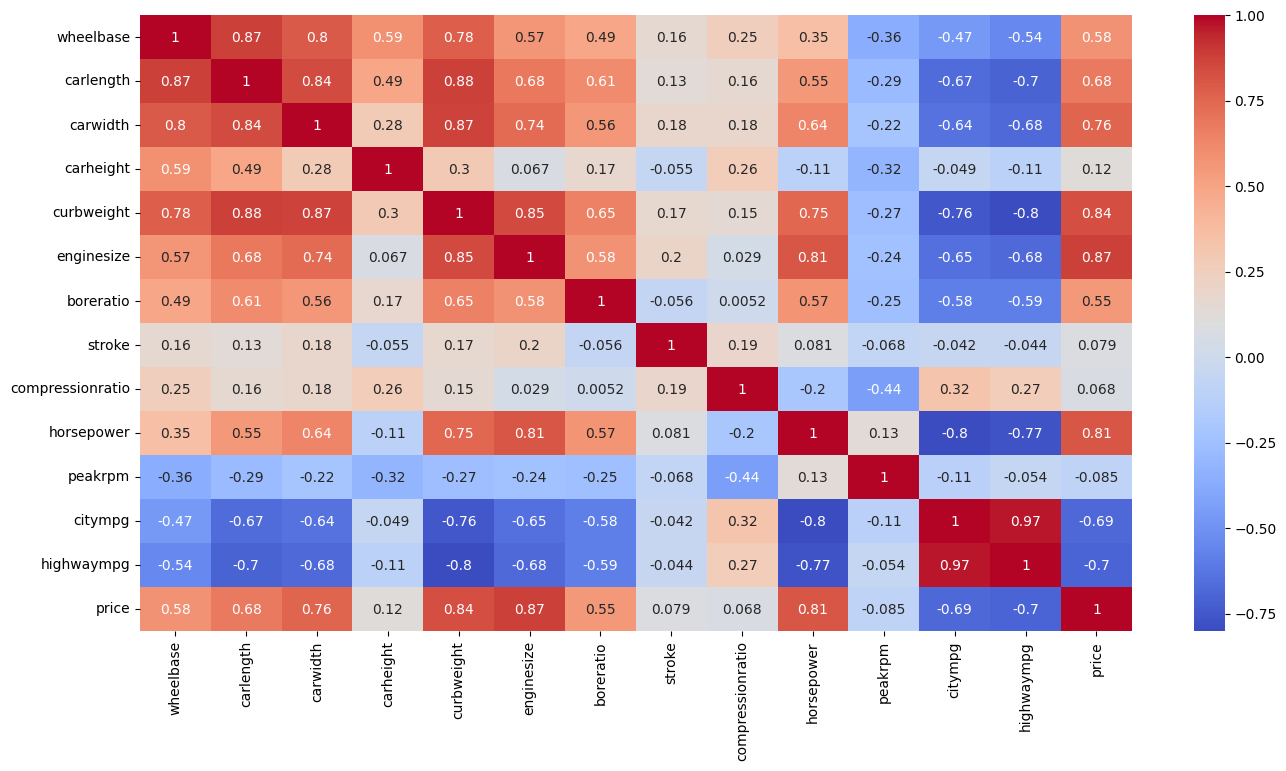

In [35]:
cor = cars_numeric.corr()
plt.figure(figsize=(16, 8))
sns.heatmap(cor, cmap='coolwarm', annot=True)
plt.show()